In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Exercise 1

In [10]:
def R2(y_data, y_model):
    return 1 - np.sum((y_data-y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)

def MSE(y_data, y_model):
    n = np.size(y_model)
    return np.sum((y_data - y_model) ** 2) /n

In [6]:
EOS = pd.read_csv("EoS.csv")
Density = EOS['Density']
Energy = EOS['Energy']

#Design Matrix
X = np.zeros((90,4))
X[:,0] = 1
X[:,1] = Density
X[:,2] = Density**2
X[:,3] = Density**3

In [17]:
#Split the Data to test and training data
X_train, X_test, y_train, y_test = train_test_split(X, Energy, test_size=0.2)

# Finding Beta
beta = np.linalg.inv(X_train.T @ X_train) @X_train.T @ y_train
ytilde = X_train @ beta

print("Trainin R2")
print(R2(y_train,ytilde))
print("Training MSE")
print(MSE(y_train,ytilde))

ypredict = X_test @ beta
print("Test R2")
print(R2(y_test,ypredict))
print("Test MSE")
print(MSE(y_test,ypredict))

Trainin R2
0.9999815037514271
Training MSE
8.684982167095594
Test R2
0.9999661836638777
Test MSE
11.969159495864623


Exercise 3

In [80]:
x = np.linspace(0,100,100)
y = 2.0 + 5*x**2 + 0.1*np.random.randn(100)

Xmodel = np.zeros((len(x),3))
Xmodel[:,0] = 1.0
Xmodel[:,1] = x
Xmodel[:,2] = x**2

x1_train, x1_test, y1_train, y1_test = train_test_split(Xmodel, y, test_size = 0.2)
beta = np.linalg.inv(x1_train.T @ x1_train) @ x1_train.T @ y1_train
ytilde = x1_train @ beta
ypredict = x1_test @ beta

#beta = np.linalg.inv(Xmodel.T @ Xmodel) @ Xmodel.T @ y
#ytilde = Xmodel @ beta

print("Training R2")
print(R2(y1_train, ytilde ))
print("Training MSE")
print(MSE(y1_train, ytilde))

print("Test R2")
print(R2(y1_test, ypredict ))
print("Test MSE")
print(MSE(y1_test, ypredict))

Training R2
0.9999999999654683
Training MSE
0.007823489852184872
Test R2
0.9999999999391939
Test MSE
0.01294364092803057


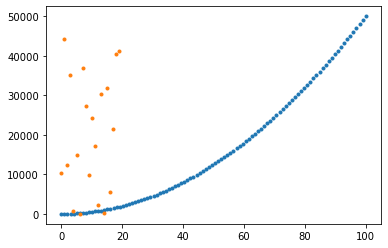

In [81]:
# Generating plot
fig, ax = plt.subplots()
ax.plot(x,y,'.', label = 'dataset')
xnew = list(range(0,20))
ax.plot(xnew,ypredict,'.')
#ax.plot(x1_train,ytilde,'+', label = 'test')
plt.show()

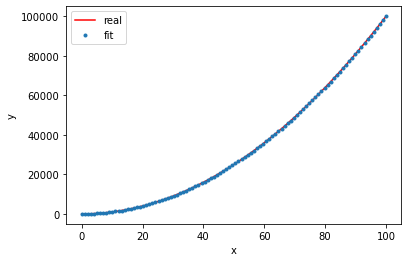

In [78]:
x = np.linspace(0,100,100)
y = 2.0 * 5*x**2 + 0.1*np.random.randn(100)

X_design = np.zeros((len(x),3))
X_design[:,0] = 1.0
X_design[:,1] = x
X_design[:,2] = x**2

beta = np.linalg.inv(X_design.T @ X_design) @ X_design.T @ y
yguess = X_design @ beta

fig,ax = plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.plot(x,y,'r-',label='real')
ax.plot(x,yguess,'.', label='fit')
ax.legend()
plt.show()